In [1]:
from sklearn.datasets import make_blobs

C:\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
from sklearn.cluster import KMeans

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math


Bad key "text.kerning_factor" on line 4 in
C:\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
get_ipython().run_line_magic('matplotlib', 'inline')

In [12]:
X, y = make_blobs(n_samples=1500, centers=4, n_features=2, random_state=800)

In [13]:
X

array([[-2.27812722, -7.57279427],
       [-6.83031405, -1.74519958],
       [-6.24869444, -2.06475276],
       ...,
       [-8.64803687, -3.1855461 ],
       [-9.04632469, -2.69650501],
       [-5.2786388 ,  6.31106977]])

In [14]:
y

array([1, 0, 0, ..., 0, 0, 2])

In [15]:
centroids = [[-6,2], [3,-4], [-5,10]]

In [16]:
X

array([[-2.27812722, -7.57279427],
       [-6.83031405, -1.74519958],
       [-6.24869444, -2.06475276],
       ...,
       [-8.64803687, -3.1855461 ],
       [-9.04632469, -2.69650501],
       [-5.2786388 ,  6.31106977]])

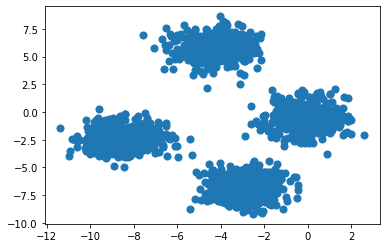

In [17]:
plt.scatter(X[:,0], X[:,1], s=50, cmap='tab20b')
plt.show()

In [18]:
y

array([1, 0, 0, ..., 0, 0, 2])

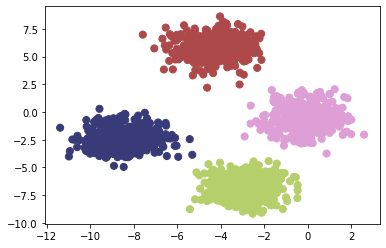

In [19]:
plt.scatter(X[:,0], X[:,1], c= y,s=50, cmap='tab20b')
plt.show()

In [21]:
import pandas as pd
import numpy as np

C:\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [22]:
iris = pd.read_csv('D:/ml/Applied-Unsupervised-Learning-with-Python-master/Lesson01/Exercise06/iris_data.csv', header = None)

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
from scipy.spatial.distance import cdist

In [25]:
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
iris.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
'PetalWidthCm', 'species']

In [27]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
'PetalWidthCm']]

In [28]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
def k_means(X, K):
#Keep track of history so you can see k-means in action
    centroids_history = []
    labels_history = []
    rand_index = np.random.choice(X.shape[0], K)  
    centroids = X[rand_index]
    centroids_history.append(centroids)
    while True:
# Euclidean distances are calculated for each point relative to centroids, #and then np.argmin returns
# the index location of the minimal distance - which cluster a point    is #assigned to
        labels = np.argmin(cdist(X, centroids), axis=1)
        labels_history.append(labels)
#Take mean of points within clusters to find new centroids:
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                for i in range(K)])
        centroids_history.append(new_centroids)
        
# If old centroids and new centroids no longer change, k-means is complete and end. Otherwise continue
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels, centroids_history, labels_history

In [30]:
X_mat = X.values

In [31]:
X_mat 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [32]:
centroids, labels, centroids_history, labels_history = k_means(X_mat,
3)

In [33]:
silhouette_score(X[['PetalLengthCm','PetalWidthCm']], labels)

0.6346461017857457

In [34]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

C:\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [37]:
%matplotlib inline
# Generate a random cluster dataset to experiment on. X = coordinate points, y = cluster labels (not needed)
X, y = make_blobs(n_samples=1000, centers=8, n_features=2, random_state=800)

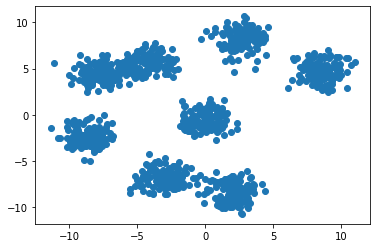

In [38]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [39]:
# Generate distance matrix with 'linkage' function
distances = linkage(X, method="centroid", metric="euclidean")
print(distances)

[[5.72000000e+02 7.62000000e+02 7.69412624e-03 2.00000000e+00]
 [3.00000000e+01 1.96000000e+02 8.87881891e-03 2.00000000e+00]
 [5.91000000e+02 8.70000000e+02 1.07476240e-02 2.00000000e+00]
 ...
 [1.98900000e+03 1.99200000e+03 7.81168528e+00 3.75000000e+02]
 [1.99500000e+03 1.99600000e+03 1.02408477e+01 7.50000000e+02]
 [1.99400000e+03 1.99700000e+03 1.20025814e+01 1.00000000e+03]]


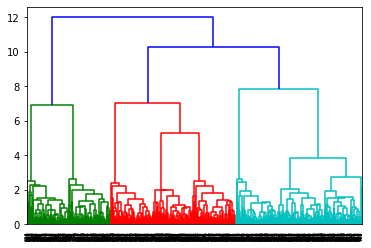

In [40]:
dn = dendrogram(distances)
plt.show()

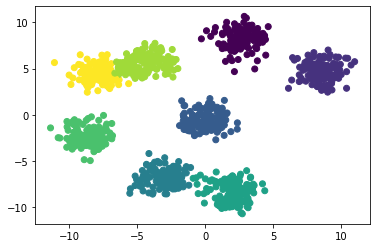

In [41]:
scipy_clusters = fcluster(distances, 3, criterion="distance")
plt.scatter(X[:,0], X[:,1], c=scipy_clusters)
plt.show()